In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.preprocessing import StandardScaler
import umap

In [2]:
# all_files = listdir('../../FUNC_ANNOT/')
# path_abund_dict = {}; all_paths=[];
# for sample in all_files:
#     temp = pd.read_csv('../../FUNC_ANNOT/'+sample+'/'+sample+'_1_pathabundance.tsv',
#                        sep='\t',comment='|')
#     temp = temp.dropna().reset_index().drop(['index'],axis=1)
#     temp = temp.rename(columns={'# Pathway':'Pathway',sample+'_1_Abundance':'RPK'})
#     temp['RPKM'] = 1e6*temp['RPK']/sum(temp['RPK'])
#     temp = temp.drop(['RPK'],axis=1)
#     path_abund_dict[sample] = temp
#     all_paths+= list(temp['Pathway'])
# all_paths = list( np.unique(all_paths) )

In [3]:
# for sample in path_abund_dict.keys():
#     temp = path_abund_dict[sample]
#     empty_paths = list( set(all_paths)-set(temp['Pathway']) )
#     empty_df = pd.DataFrame(zip(empty_paths,[0 for i in range(len(empty_paths))]), columns=['Pathway','RPKM'])
#     new_df = pd.concat([temp,empty_df]).reset_index().drop(['index'],axis=1)
#     new_df = new_df.set_index(['Pathway']).reindex(all_paths)
#     path_abund_dict[sample]=new_df
    
# merge_abund = pd.DataFrame(zip(all_paths),columns=['Pathway'])
# for sample in path_abund_dict.keys():
#     merge_abund[sample+'_RPKM']= list(path_abund_dict[sample]['RPKM'])
# merge_abund.to_csv('../data/metagenome/pathabundance.csv',index=None)

In [9]:
path_abund = pd.read_csv('../data/metagenome/pathabundance.csv')
path_abund = path_abund.set_index(['Pathway'])
path_abund = path_abund.drop(['UNINTEGRATED','UNMAPPED'],axis=0)

# UMAP

In [21]:
path_abund_T = path_abund.T
X = path_abund_T.iloc[:,:].values
X = StandardScaler().fit_transform(X)
reducer_path = umap.UMAP(random_state=1)
embedding = reducer_path.fit_transform(X)
umap_pd = pd.DataFrame(embedding, columns =['UMAP-1','UMAP-2'])
umap_pd['Group'] = ['A (20~30yo)' for i in range(10)] + ['B (55~80yo)' for i in range(10)]

/home/bras5181/miniconda3/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


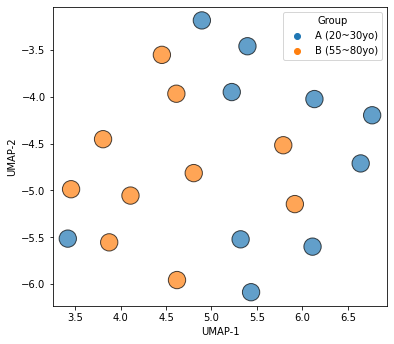

In [23]:
fig, ax = plt.subplots(1,1,figsize=(6,5.5))
sns.scatterplot(x='UMAP-1', y='UMAP-2',hue="Group",
            linewidth=1,data=umap_pd, s=300, alpha=0.7, edgecolor='black', ax=ax)
ax.set_xlabel('UMAP-1'); ax.set_ylabel('UMAP-2');
# plt.savefig('../../../../Oral_paper/Figures_2025/umap_pathway.svg',format='svg',dpi=150)

# Differential analysis for pathway abundance

In [ ]:
# from pydeseq2.dds import DeseqDataSet
# from pydeseq2.default_inference import DefaultInference
# from pydeseq2.ds import DeseqStats